# Приоритизация гипотез и проведение А/В тестов

Для интернет-магазина составлено 9 гипотез, которые могут привести к увеличению выручки. Наша задача - выбрать приоритетные для нас гипотезы, которые наиболее вероятно увеличат нашу выручку. Кроме того, мы имеем данные о результатах проведенного А/В теста - заказы и посещения сайта по датам и группам. Нам нужно изучить эти данные и принять решение об остановке теста либо о его продолжении.
Сначала займемся приоритизацией гипотез.

## Приоритизация гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
hypothesis.columns = map(str.lower, hypothesis.columns)

In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Кроме описания самой гипотезы есть 4 оценки: reach - охват пользователей, impact - влияние на пользователей, confidence - уверенность в гипотезе, efforts - затраты ресурсов на проверку гипотезы, все в оценках по 10-балльной шкале. Применим для начала фреймворк ICE для приоритизации - умножим влияние на уверенность и поделим на затраты. 

In [7]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

In [8]:
pd.set_option("max_colwidth",200)
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


При использовании фреймворка ICE перспективными гипотезами оказались 8,0 и 7. Посмотрим,изменится ли их положение при применении RICE. Его отличие от ICE домножении дроби на показатель охвата.

In [9]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

In [10]:
pd.set_option("max_colwidth",200)
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При использовании RICE картина другая - он вывел в топ 7, 2, 0 и 6 гипотезы. У 8й гипотезы слишком маленький охват пользователей, поэтому она в данном случае не вышла вверх. 2 и 6 гипотезы имеют низкую оценку влияния на пользователей, поэтому в пред. фреймворке не опали в топ приоритизации, но имеют достаточный уровень охвата.
Стоит обратить внимание на 7 и 0 гипотезы, которые были в приоритете по результатам применения двух фреймворков.

## А/В тесты

### Подготовка данных

У нас есть данные по заказам и визитам по результатам А/В тестирования. Изучим их.

In [11]:
orders = pd.read_csv('/datasets/orders.csv')
visits = pd.read_csv('/datasets/visitors.csv')

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visits.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
orders.duplicated().sum()

0

In [17]:
visits.duplicated().sum()

0

Дубликатов и пропущенных значений нет. Но у столбцов с датами не тот тип, изменим его.

In [18]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [20]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Кумулятивные значения

Создадим датафрейм с кумулятивными данными. Создаем массив уникальных пар дата-группа из данных таблицы заказов

In [21]:
datesGroups = orders[['date','group']].drop_duplicates()

Создадим таблицу с агрегированными кумулятивными значениями кол-ва покупателей и выручки для каждой даты и группы.

In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    ({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'})
), axis=1).sort_values(by=['date','group']) 

In [23]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Аналогично агергируем данные по таблице посетителей.

In [24]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], 
                                                                     visits['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'})
    , axis=1).sort_values(by=['date','group']) 

In [25]:
visitsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Объединяем таблицы в одну.

In [26]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [27]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Поделим полученную таблицу на две: с данными по группе А и по группе В.

In [28]:
cumulativeA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

In [29]:
cumulativeB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

### Графики кумулятивных выручки и среднего чека

Разбитые по группам кумулятивные данные у нас уже есть, можем построить графики. Сначала построим график по кумулятивной выручке.

In [30]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

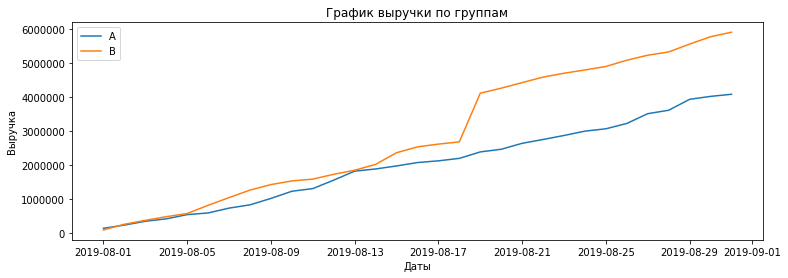

In [31]:
plt.plot(cumulativeA['date'], cumulativeA['revenue'], label='A')
plt.plot(cumulativeB['date'], cumulativeB['revenue'], label='B')
plt.legend()
plt.title('График выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Даты')
plt.subplots_adjust(left=0.0009, right=1.6)

Группа В в середине теста по выручке вырвалась вперед, но мы видим резкий скачок, поэтому скорей всего был какой-то дорогой заказ. Группа А растет равномерно, без существенных скачков. Перейдем к рассчмотрению графиков средних чеков.

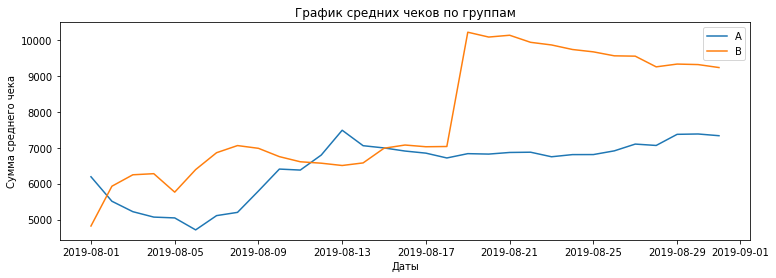

In [32]:
plt.plot(cumulativeA['date'], cumulativeA['revenue']/cumulativeA['orders'], label='A')
plt.plot(cumulativeB['date'], cumulativeB['revenue']/cumulativeB['orders'], label='B')
plt.legend() 
plt.title('График средних чеков по группам')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Даты')
plt.subplots_adjust(left=0.0009, right=1.6)

Видим скачок в группе В, что опять же видимо происходит из-за наличия дорогих заказов (или заказа). У группы А тоже есть пик в средних чеках, в дальнейшем средний чек распределен равномерно.

### График относительного изменения среднего чека

Построим график относительного изменения кумулятивного среднего чека группы В к группе А.

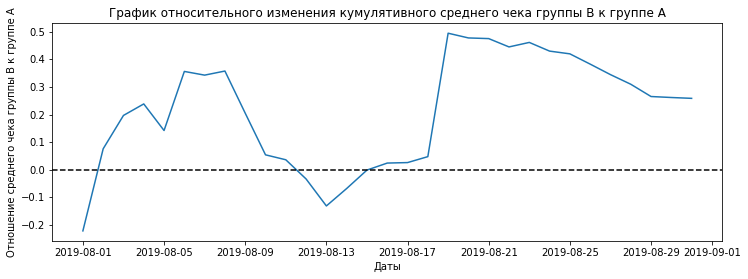

In [33]:
mergedCumulative = cumulativeA.merge(cumulativeB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 4))
plt.plot(mergedCumulative['date'], (mergedCumulative['revenueB']/mergedCumulative['ordersB'])/(mergedCumulative['revenueA']/mergedCumulative['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.ylabel('Отношение среднего чека группы В к группе А')
plt.xlabel('Даты')
plt.show()

Как видим график различия резко скачет в некоторых точках, определенно есть выбросы. Посмотрим графикидля конверсии.

### Графики изменения конверсий

In [34]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
display(cumulativeData['date'].min())
cumulativeData['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

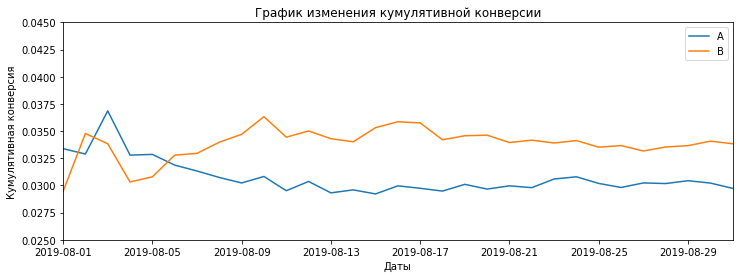

In [35]:
plt.figure(figsize=(12, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График изменения кумулятивной конверсии')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Даты')
plt.axis(['2019-08-01', '2019-08-31', 0.025, 0.045]) 
plt.show()

Видим, что конверсия группы А сначала вырвалась вперед, но затем снизилась, и группа В по этому показателю выше. Изучим график относительного изменения конверсий.

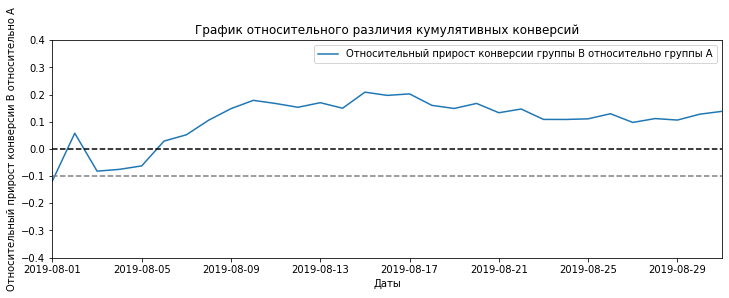

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного различия кумулятивных конверсий')
plt.ylabel('Относительный прирост конверсии В относительно А')
plt.xlabel('Даты')
plt.axis(['2019-08-01', '2019-08-31', -0.4, 0.4]) 
plt.show()

Видим наличие скачка в начале графика, и отмечаем, что группа В по конверсии проигрывала группе А сначала, но с 5го числа начала расти. Теперь же перейдем к рассмотрению выбросов.

## Анализ выбросов

На графиках мы видели резкие скачки, из чего можем предположить, что были дорогие заказы. Посмотрим, как выглядит точечный график суммам заказов.

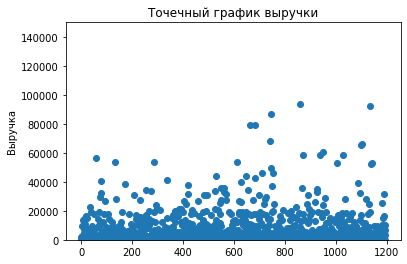

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylim(0, 150000)
plt.title('Точечный график выручки')
plt.ylabel('Выручка')
plt.show()

Да, действительно мы видим, что есть заказы с достаточно высокой стоимостью, которые выбиваются из общей массы. Границу можно провести между 30 и 40 т.р. Используем персетили, чтобы точно определить границу, выше которой начинаются аномальные значения.

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 т.р., и не более 1% дороже 58233 р. Возьмем границу для отсечения аномалий в 30 т.р. Посмотрим на кол-во заказов, нет ли аномалий там. Создадим таблицу, где оставим только пользователей и заказы.

In [39]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orders']

Построим точечный график и также посмотрим персентили.

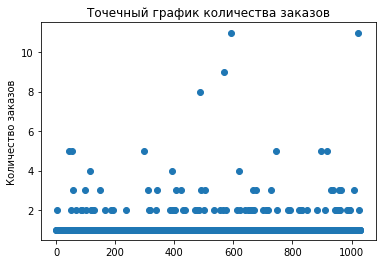

In [40]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов')
plt.ylabel('Количество заказов')
plt.show()

Видим, что мало кто делает 4 заказа и выше.

In [41]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей сделали больше 2 х заказов и не более 1% - выше 4. Выберем за нижнюю границу 4 заказа для определения порога аномалий. Перейдем к оценки статистической значимости.

### Статистическая значимость по первичным данным

Подготовим данные. Считаем кумулятивную сумму посетителей по датам.

In [42]:
visitsADaily = visits[visits['group'] == 'A'][['date', 'visitors']]
visitsADaily.columns = ['date', 'visitorsPerDateA']
visitsACummulative = visitsADaily.apply(
    lambda x: visitsADaily[visitsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)
visitsACummulative.columns = ['date', 'visitorsCummulativeA']
visitsBDaily = visits[visits['group'] == 'B'][['date', 'visitors']]
visitsBDaily.columns = ['date', 'visitorsPerDateB']
visitsBCummulative = visitsBDaily.apply(
    lambda x: visitsBDaily[visitsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)
visitsBCummulative.columns = ['date', 'visitorsCummulativeB']

Проделаем тоже самое, но уже с заказами.

In [43]:
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
    
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),axis=1).sort_values(by=['date'])

ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим полученные таблицы в одну.

In [44]:
data_total = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitsADaily, left_on='date', right_on='date', how='left')
    .merge(visitsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitsBCummulative, left_on='date', right_on='date', how='left')
)

Создадим таблицы с с кол-вом заказов на каждого пользователя.

In [45]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [46]:
ordersByUsersA.shape

(503, 2)

In [47]:
ordersByUsersB.shape

(586, 2)

Проверим, есть ли пользователи, которые попали и в группу А, и в группу В.

In [48]:
compare=ordersByUsersA.merge(ordersByUsersB, left_on='userId', right_on='userId', how='left')

In [49]:
compare_id = compare[compare['orders_y'].notna()].reset_index()['userId']
len(compare_id)

58

Да, такие пользователи есть, из-за их пристутвия результаты А/В теста будут неоднозначны, поэтому удалим их из дальнейшего рассмотрения, прежде чем оцениваь стат.значимость.

In [50]:
ordersByUsersA =  ordersByUsersA.query('userId not in @compare_id')
ordersByUsersB =  ordersByUsersB.query('userId not in @compare_id')

In [51]:
ordersByUsersA.shape

(445, 2)

In [52]:
ordersByUsersB.shape

(528, 2)

Теперь сделаем таблицу, где учтем всех пользователей, даже тех, которые заказ не сделали (им в столбце заказа будет присвоено значение 0).

In [53]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data_total['visitorsPerDateA'].sum() 
                                                                           - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_total['visitorsPerDateB'].sum() 
                                                                           - len(ordersByUsersB['orders'])), name='orders')],axis=0)

#### Статистическая значимость различий конверсий

Сформулируем нулевую гипотезу: конверсии в группах А и В различий не имеют. Альтернативная гипотеза: различия в конверсиях групп А и В есть. Применим тест Манна-Уитни и проверим стат.значимость различий в конверсиях между двумя полученными группами.

In [54]:
stats.mannwhitneyu(sampleA, sampleB)[1]

0.0055090420550073455

Полученное значение p-value ниже 0.05, значит различия в конверсиях есть, нулевую гипотезу отвергаем. Перейдем к ср.чеку.

#### Статистическая значимость различий ср.чеков

Сформулируем нулевую гипотезу: различий в средних чеках тестируемых групп нет. Альтернативная гипотеза: различия в ср.чеках групп А и В есть. И не будем учитывать пользователей, которые есть в обоих группах.

In [55]:
orders_new=orders.query('visitorId not in @compare_id')

In [56]:
stats.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'])[1]

0.41474544990747664

В данном случае P-value значительно больше 0.05. Нулевую гипотезу отвергнуть не можем, считаем, что различий в ср.чеке нет. Но, как помним, у нас есть выбросы в данных, посмотрим, что изменится после очистки данных от этих аномалий.

### Статистическая значимость по очищенным данным

In [57]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 5]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

In [58]:
abnormalUsers.shape

(51,)

Всего аномальных пользовтелей в нашей выборке было 52 человека.

Делаем таблицы, которые делали ранее по фактическим данным, где для каждого посетителя пишем кол-во заказов, если у посетителя заказов не было - присваиваем 0.

In [59]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data_total['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data_total['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

#### Статистическая значимость различий конверсий

Сформулируем нулевую гипотезу: конверсии в группах А и В, очищенных от выбросов, различий не имеют. Альтернативная гипотеза: различия есть.

In [60]:
stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

0.0066537106234423864

Полученное значение p-value ниже 0.05, поэтому нулевую гипотезу отвергаем, есть значимые различия между конверсиями двух групп.

#### Статистическая значимость различий ср.чеков

Нулевая гипотеза: ср.чеки в группах А и В, очищенных от выбросов, различий не имеют. Альтернативная гипотеза: различия есть.

In [61]:
stats.mannwhitneyu(orders_new[np.logical_and(orders_new['group'] == 'A', np.logical_not(orders_new['visitorId'].isin(abnormalUsers)))
            ]['revenue'],orders_new[np.logical_and(orders_new['group'] == 'B',np.logical_not(orders_new['visitorId'].isin(abnormalUsers)),
                )]['revenue'],)[1]

0.42112906804810024

Получили значение выше 0,05, т.е. нулевую гипотезу отвергнуть не можем, различий в ср.чеках нет.

# Выводы

У нас в распоряжении было две таблицы - с кол-вом посещений по датам и с заказами по каждому клиенту с разбивкой по датам. Мы провели агрегацию и кумуляцию этих данных для интерпретации А/В теста и для принятия решения по дальнейшим действиям.

По выручке группа В в середине теста обогнала группу А, аналогичная тенденция была и в случае среднего чека. При этом на графиках отмечались скачки, что говорит об аномалиях, и мы их нашли.  В связи с этим мы оставили данные с выручкой до 30 т.р. и количеством заказов до 4. Кол-во пользователей, у которых информация по заказам была выше, составило 52 человека. Однако дополнительно было выявлено наличие пользователей, совершивших заказы как в группе А, так и в группе Б, их 57 человек, их мы также удалили для проведения корректного расчета статистической значимости различий конверсий и ср.чека. 

Было проведено исследование стат.значимости различий по группам через использования теста Манна-Уитни. В итоге получили, что есть статистически значимое различие по конверсии между группами как по фактическим данным, так и после фильтрации аномалий.

По среднему чеку по фактическим данным значимого статичтически различия нет, тот же самый вывод был сделан после очистки данных.

График различия конверсии между группами сообщает, что результаты группы B лучше группы A, при этом развитие идет очень равномерно.

Исходя из этого стоит остановить А/В тест, группа В лучше по конверсии, график конверсии стабилен, и показатели выше группы А.